In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset=pd.read_csv(r"C:\Users\Admin\Downloads\wine quality data (1).csv")

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [4]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [6]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [7]:
dataset['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
L1=LabelEncoder()
dataset["quality"]=L1.fit_transform(dataset['quality'])
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [9]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 1])

In [10]:
from sklearn.preprocessing import StandardScaler#MinMaxScaler
m1=StandardScaler()
X=m1.fit_transform(x)
print(X.max())
print(X.min())

11.127034553969864
-3.700401226239349


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [12]:
from keras import callbacks
early_stopping=callbacks.EarlyStopping(
min_delta=0.001,# minimium amount of change to count as an improvement
patience=20,# how many epochs to wait before stopping
restore_best_weights=True)

# Adagard

In [13]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=25,activation='LeakyReLU'))
#ann.add(tf.keras.Layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,batch_size=32,epochs=100)


Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 9.2384 - accuracy: 0.4660
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 7.7459 - accuracy: 0.4441
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 6.8944 - accuracy: 0.4488
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 6.2907 - accuracy: 0.4269
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 5.8444 - accuracy: 0.4097
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 5.5048 - accuracy: 0.3862
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 5.2411 - accuracy: 0.3870
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 5.0261 - accuracy: 0.3870
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 4.8470 - accuracy: 0.3792
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 4.6933 - accuracy: 0.3745
Epoch 11/

40/40 [==============================] - 0s 2ms/step - loss: 1.1791 - accuracy: 0.3636
Epoch 84/100
40/40 [==============================] - 0s 3ms/step - loss: 1.1630 - accuracy: 0.3651
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 1.1472 - accuracy: 0.3667
Epoch 86/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1320 - accuracy: 0.3675
Epoch 87/100
40/40 [==============================] - 0s 2ms/step - loss: 1.1173 - accuracy: 0.3620
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 1.1030 - accuracy: 0.3612
Epoch 89/100
40/40 [==============================] - 0s 2ms/step - loss: 1.0893 - accuracy: 0.3604
Epoch 90/100
40/40 [==============================] - 0s 2ms/step - loss: 1.0759 - accuracy: 0.3636
Epoch 91/100
40/40 [==============================] - 0s 2ms/step - loss: 1.0630 - accuracy: 0.3651
Epoch 92/100
40/40 [==============================] - 0s 2ms/step - loss: 1.0506 - accuracy: 0.3683
Epoch 93/100


In [14]:
y_ann=ann.predict(x_test)
A=[]
for y in y_ann:
    if y>0.5:
        A.append(1)
    else:
        A.append(0)

10/10 [==============================] - 0s 3ms/step


In [15]:
# y_ann=ann.predict(x_test)
# y_ann

In [16]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,A)*100
print('test accuracy',a)

test accuracy 37.5


In [17]:
# ANN_df = pd.DataFrame(ANN,ANN)

# plt.plot(ANN_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
# plt.plot(ANN_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

# plt.title('Training and Validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [18]:
# history_df = pd.DataFrame(ANN.ANN)

# plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
# plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend(loc="best")

# plt.show()

<AxesSubplot:>

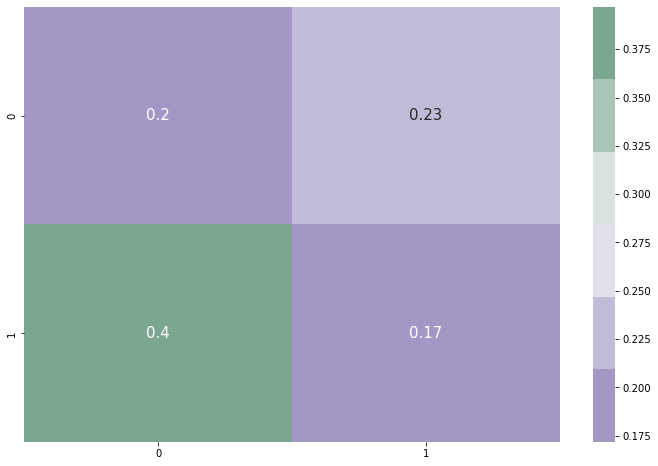

In [19]:
#confusion matrix
from sklearn.metrics import precision_score, recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
cmap1=sns.diverging_palette(275,150,s=40,l=65,n=6)
plt.subplots(figsize=(12,8))
cf_matrix=confusion_matrix(y_test,A)
sns.heatmap(cf_matrix/np.sum(cf_matrix),cmap=cmap1,annot=True,annot_kws={'size':15})

In [20]:
print(classification_report(y_test, A))

              precision    recall  f1-score   support

           0       0.34      0.47      0.39       138
           1       0.43      0.30      0.35       182

    accuracy                           0.38       320
   macro avg       0.38      0.39      0.37       320
weighted avg       0.39      0.38      0.37       320



# RMSProp

In [21]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=25, activation='LeakyReLU'))
# ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)
# ANN = ann.fit(x_train, y_train, batch_size = 32, epochs = 100,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
40/40 [==============================] - 1s 4ms/step - loss: 0.7188 - accuracy: 0.5989
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.6114
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6559 - accuracy: 0.6357
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.6364
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6341
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.6521
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.6482
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.6591
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.6724
Epoch 10/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.6599
Epoch 11/

40/40 [==============================] - 0s 2ms/step - loss: 0.5385 - accuracy: 0.7256
Epoch 84/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.7287
Epoch 85/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7334
Epoch 86/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.7232
Epoch 87/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5341 - accuracy: 0.7209
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5302 - accuracy: 0.7256
Epoch 89/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7295
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5346 - accuracy: 0.7287
Epoch 91/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5270 - accuracy: 0.7287
Epoch 92/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7389
Epoch 93/100


In [22]:
y_ann=ann.predict(x_test)
A=[]
for y in y_ann:
    if y>0.5:
        A.append(1)
    else:
        A.append(0)

10/10 [==============================] - 0s 2ms/step


In [23]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,A)*100
print("test accuracy",a)

test accuracy 74.6875


<AxesSubplot:>

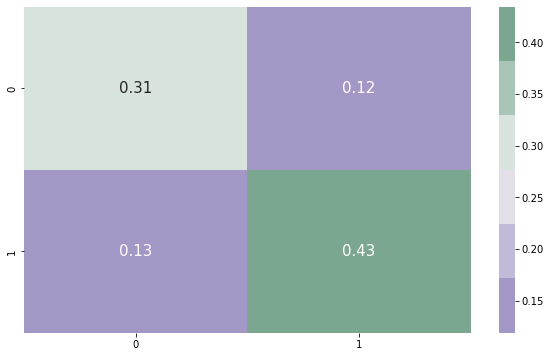

In [24]:
# confusion matrix
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(10,6))
cf_matrix = confusion_matrix(y_test, A)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [25]:
print(classification_report(y_test, A))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       138
           1       0.79      0.76      0.77       182

    accuracy                           0.75       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.75      0.75       320



In [26]:
#Adagrad Gradient Descent Accuracy-65.0
#RmsProp Gradient Descent Accuracy-72.8125